#### Clean the data

In [4]:
import pandas as pd

# Load data with specified encoding
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_20231101_20241001.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Verify removal of duplicates
data.info()

# Save the cleaned data back to the original CSV file
data.to_csv('/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_20231101_20241001.csv', index=False)

print("Duplicates removed and CSV updated successfully.")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55652253 entries, 0 to 55652357
Data columns (total 25 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   union_id        object
 1   gender          object
 2   race            object
 3   season          object
 4   style_new       object
 5   root_category   object
 6   category        object
 7   kid_category    object
 8   collar          object
 9   sleeve          object
 10  sleeve_type     object
 11  fabric          object
 12  contour         object
 13  clothes_age     object
 14  clothes_length  object
 15  texture         object
 16  accessories     object
 17  technology_new  object
 18  color           object
 19  note_id         object
 20  user_id         object
 21  publish_time    object
 22  like_num        int64 
 23  comment_num     int64 
 24  collect_num     int64 
dtypes: int64(3), object(22)
memory usage: 10.8+ GB
Duplicates removed and CSV updated successfully.


In [6]:
# Count total rows in the dataset
total_rows_count = data.shape[0]

# Display the result
print("Total rows:", total_rows_count)


Total rows: 55652253


In [7]:
# Count distinct rows by considering all columns (to ensure row uniqueness)
distinct_rows_count = data.drop_duplicates().shape[0]

# Count distinct values in the 'union_id' column
distinct_union_id_count = data['union_id'].nunique()

# Display the results
print("Distinct rows:", distinct_rows_count)
print("Distinct union_id values:", distinct_union_id_count)


Distinct rows: 55652253
Distinct union_id values: 32148236


In [5]:
# Count distinct values in the 'style_new' column
distinct_style_new_count = data['style_new'].nunique()

# Display the result
print("Distinct style_new values:", distinct_style_new_count)

Distinct style_new values: 2916


#### Check styles
1. Clusters the data by style_new.
2. Counts the unique union_id and note_id values for each style.
3. Sorts the styles by the count of note_id and selects the top 10 styles.
4. Visualizes the results in a bar chart.

/tmp/ipykernel_3320287/1727176710.py:24: UserWarning: Glyph 159 (\x9f) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3320287/1727176710.py:24: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3320287/1727176710.py:24: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3320287/1727176710.py:24: UserWarning: Glyph 144 (\x90) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3320287/1727176710.py:24: UserWarning: Glyph 138 (\x8a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3320287/1727176710.py:24: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3320287/1727176710.py:24: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3320287/1727176710.py:24: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_l

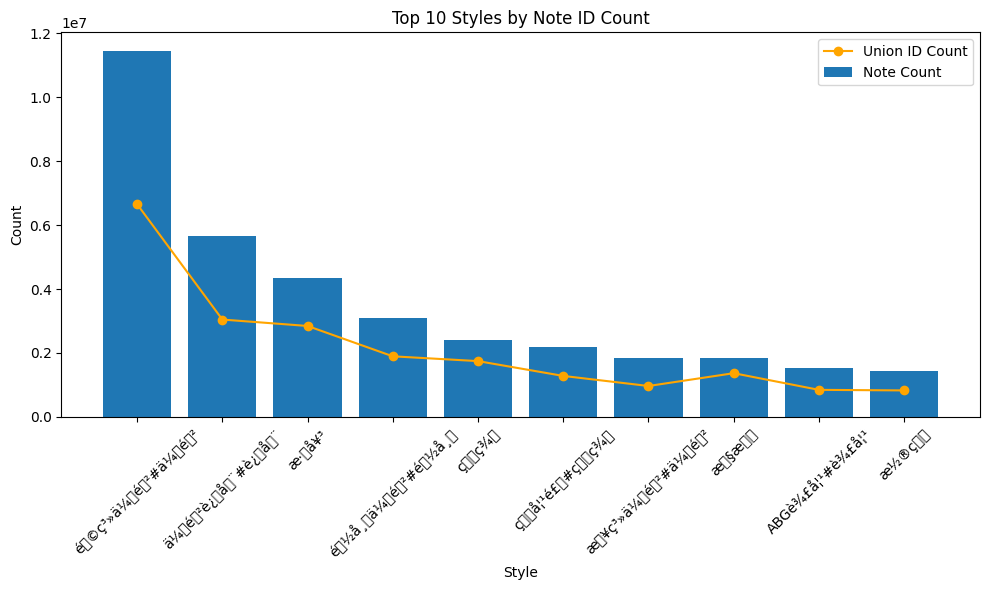

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Load font for Chinese characters (update path to your preferred font)
chinese_font = FontProperties(fname='/usr/share/fonts/truetype/arphic/ukai.ttc')  # Replace with a suitable Chinese font path

# Group by 'style_new' and count unique 'union_id' and 'note_id' for each style
style_counts = data.groupby('style_new').agg(
    unique_union_id_count=('union_id', 'nunique'),
    note_id_count=('note_id', 'count')
).reset_index()

# Sort by 'note_id_count' to get the top 10 styles
top_10_styles = style_counts.sort_values(by='note_id_count', ascending=False).head(10)

# Plotting the top 10 styles
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_styles['style_new'], top_10_styles['note_id_count'], label='Note Count')
ax.plot(top_10_styles['style_new'], top_10_styles['unique_union_id_count'], color='orange', marker='o', label='Union ID Count')

# Add labels and legend with Chinese font support
ax.set_xlabel('Style', fontproperties=chinese_font)
ax.set_ylabel('Count', fontproperties=chinese_font)
ax.set_title('Top 10 Styles by Note ID Count', fontproperties=chinese_font)
ax.legend(prop=chinese_font)
plt.xticks(rotation=45, fontproperties=chinese_font)
plt.tight_layout()

# Display the plot
plt.show()
